In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

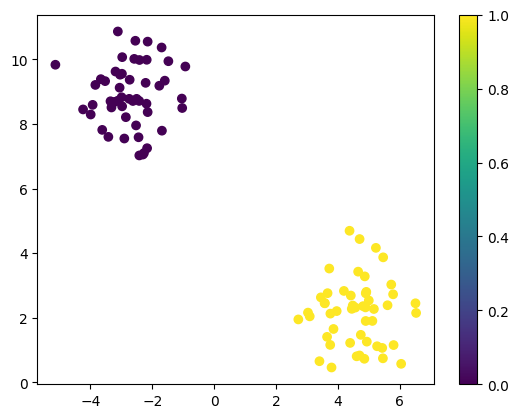

In [2]:
# Create dataset
x,y = make_blobs(centers=2, random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar()

In [8]:
class LinearRegression:

    def __init__(self, alpha) -> None:
        self.w = None
        self.alpha = alpha

    def _prepare_input(self, x):
        return np.concatenate((x, np.ones(len(x)).reshape(-1,1)), axis=1)

    @property
    def coef_(self):
        return self.w[:-1]

    @property
    def intercept_(self):
        return self.w[-1]

    def fit(self, x, y):
        x = self._prepare_input(x)
        # Normal Equation: w = (X^T X)^(-1) X^T y
        self.w = np.linalg.inv(x.T @ x) @ x.T @ y

    def predict(self, x):
        X = self._prepare_input(x)
        return X @ self.w

Coefficients: [ 0.0802748  -0.05680931]
Intercept: 0.7376771384235444


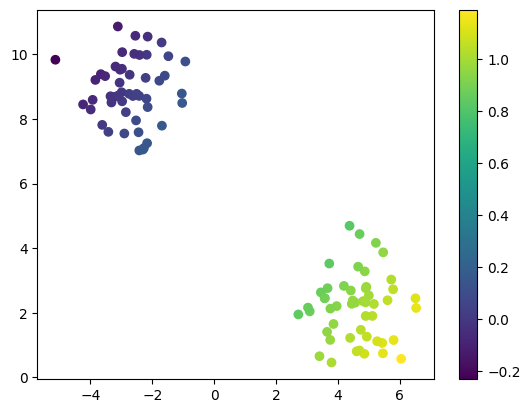

In [9]:
model = LinearRegression(alpha=0.1)
model.fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict and plot
col = model.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=col)
plt.colorbar()
plt.show()

# Real world dataset 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/TrainArousal.csv", sep=";")

In [ ]:
x = df.drop(columns=["mean_arousal", "song_id"]).values
y = df.mean_arousal.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

model = LinearRegression(0)
model.fit(x_train, y_train)

pred = model.predict(x_test)
print(r2_score(y_test, pred))

0.5221889419845783


In [ ]:
from sklearn.linear_model import LinearRegression as skLinearRegression

model2 = skLinearRegression()
model2.fit(x_train, y_train)

pred = model2.predict(x_test)
print(r2_score(y_test, pred))

0.5221889419847539


# Real world dataset 2

In [ ]:
df = pd.read_csv("./data/TrainValence.csv", sep=";")

In [ ]:
x = df.drop(columns=["mean_valence", "song_id"]).values
y = df.mean_valence.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression(0)
model.fit(x_train, y_train)

pred = model.predict(x_test)
print(r2_score(y_test, pred))

In [ ]:
model2 = skLinearRegression()
model2.fit(x_train, y_train)

pred = model2.predict(x_test)
print(r2_score(y_test, pred))